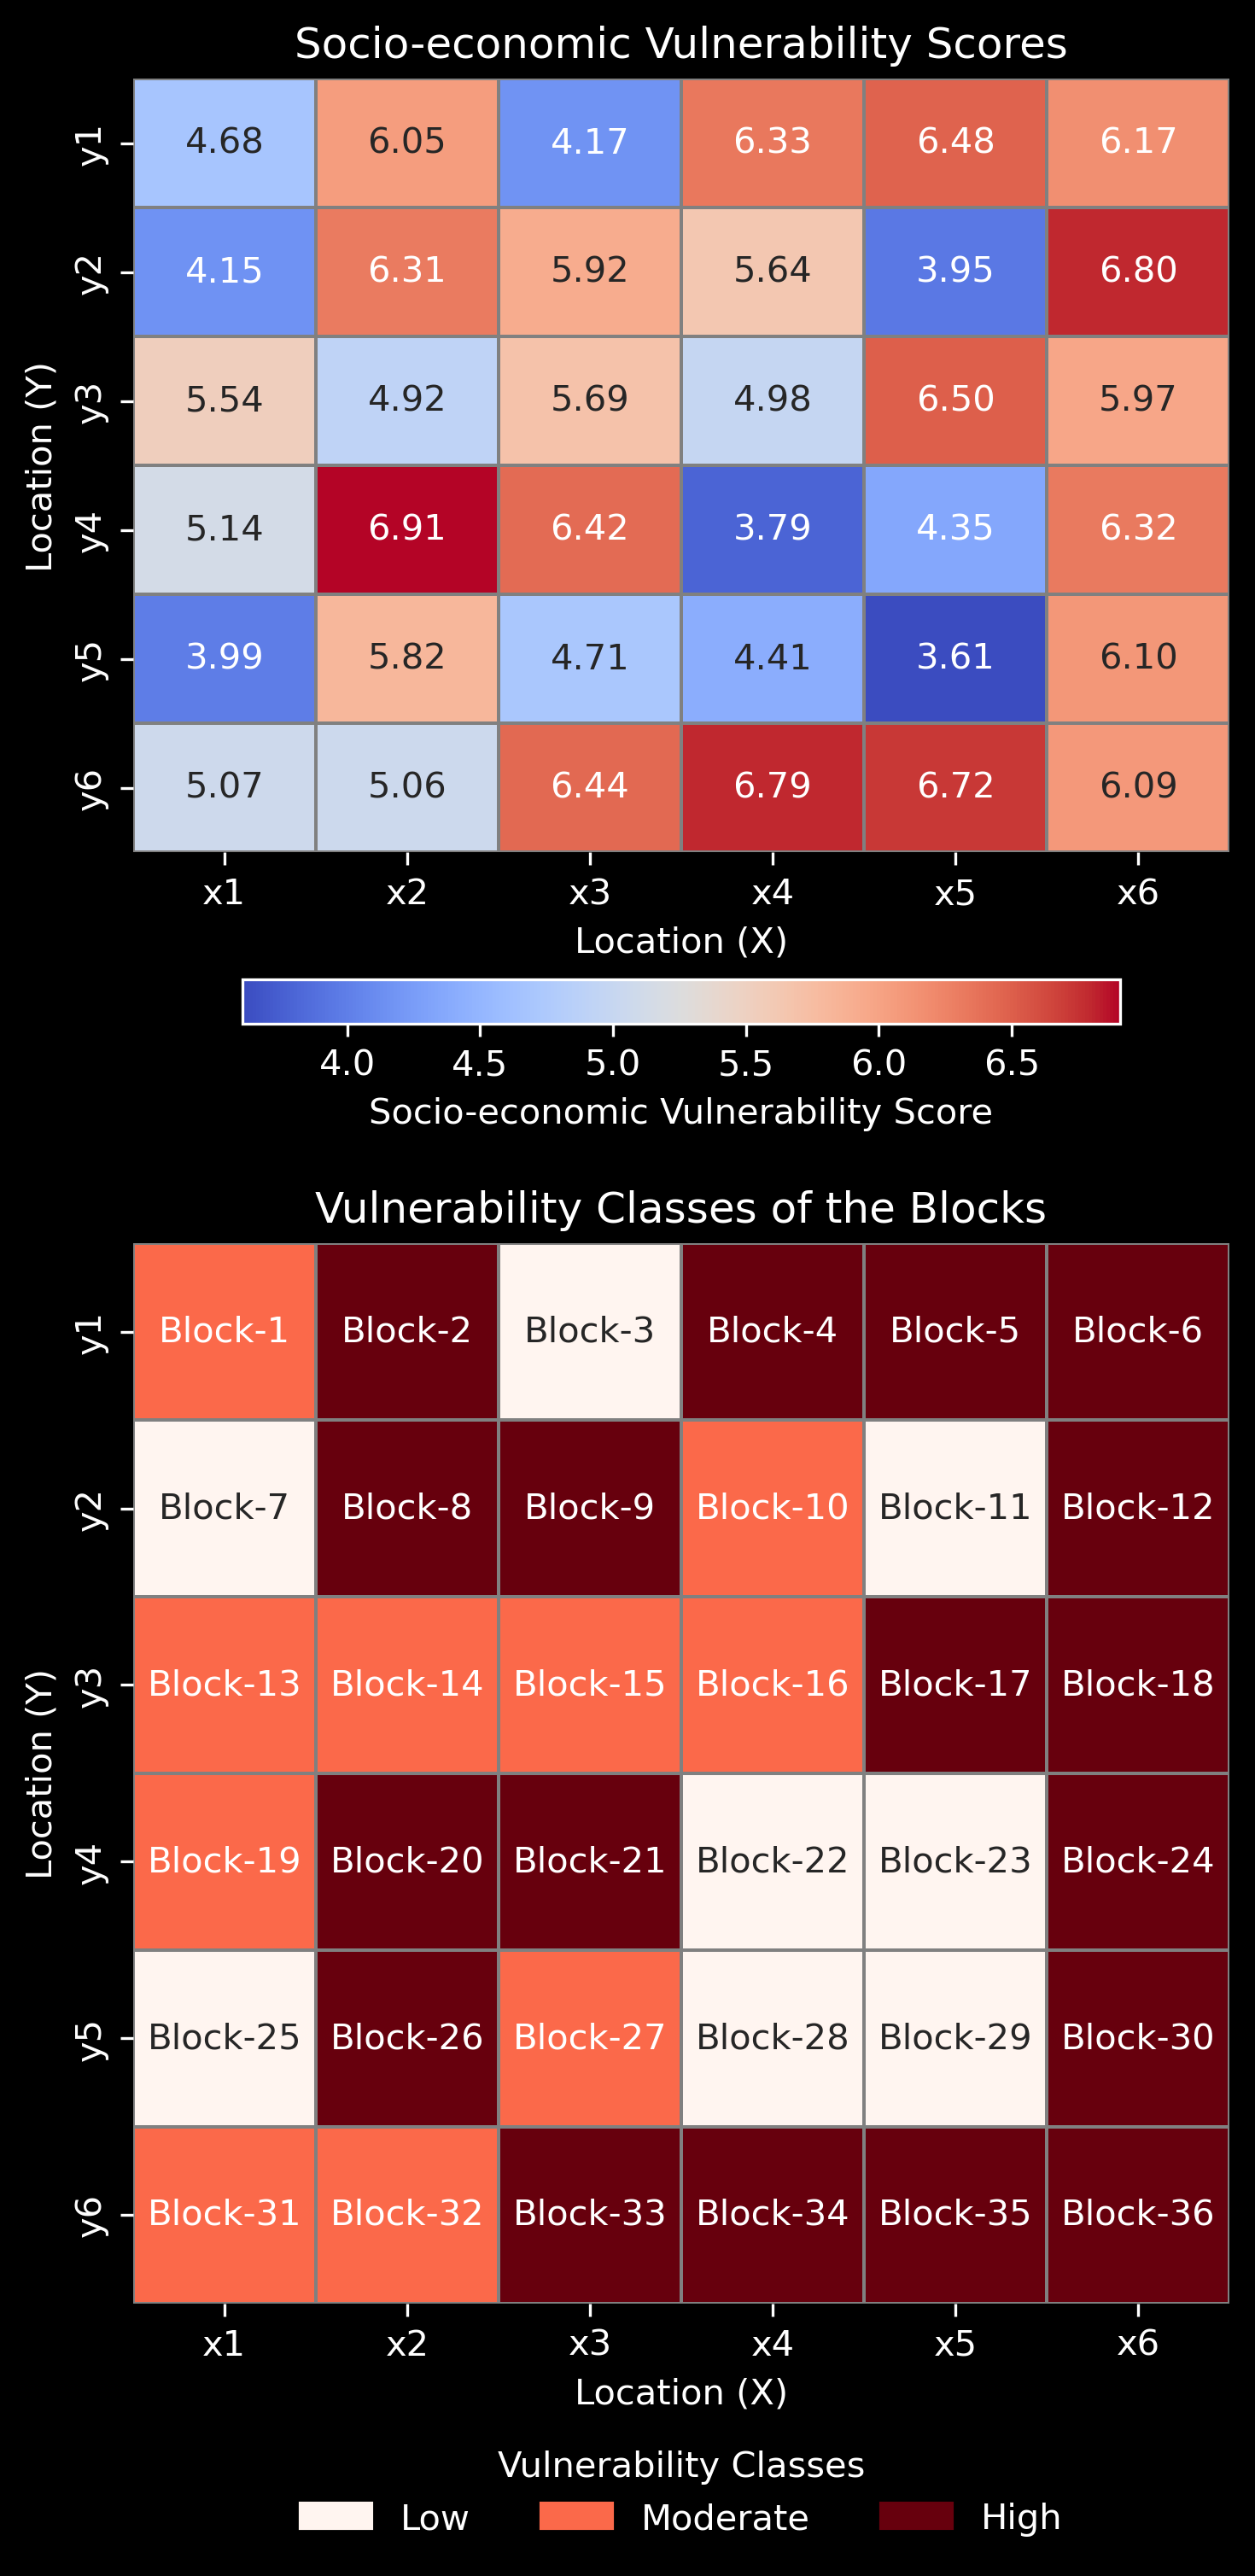

In [1]:
import warnings
import numpy as np
import pandas as pd
import jenkspy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

np.random.seed(47)
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

# Define block IDs
block_ids = np.arange(1, 37).reshape(6, 6)

# Generate socio-economic vulnerability scores
socio_economic_vulnerability_scores = np.concatenate([
    np.random.normal(5, 1, 12),
    np.random.normal(6, 1, 12),
    np.random.normal(6, 1, 12),
]).reshape(-1, 6)
np.random.shuffle(socio_economic_vulnerability_scores)

sev_score_grid = pd.DataFrame(
    socio_economic_vulnerability_scores,
    columns=[f'x{i+1}' for i in range(6)],
    index=[f'y{i+1}' for i in range(6)]
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 10), dpi=300)

# Plot the first heatmap for socio-economic vulnerability scores
sns.heatmap(sev_score_grid, annot=True, fmt='.2f', 
            cmap='coolwarm', cbar=False, linewidths=0.5, 
            linecolor='gray', ax=ax1)

ax1.set_title("Socio-economic Vulnerability Scores", fontsize=12)
ax1.set_xlabel('Location (X)')
ax1.set_ylabel('Location (Y)')
cbar1 = fig.colorbar(ax1.collections[0], ax=ax1, 
                     orientation='horizontal', pad=0.12, 
                     shrink=0.8)
cbar1.set_label('Socio-economic Vulnerability Score')

# Calculate Jenks breaks for categorizing vulnerability
breaks = jenkspy.jenks_breaks(
    socio_economic_vulnerability_scores.flatten(), 
    n_classes=3
)

def categorize_vulnerability(value):
    if value <= breaks[1]:
        return 'Low'
    elif value <= breaks[2]:
        return 'Moderate'
    else:
        return 'High'

vulnerability_grid = sev_score_grid.map(categorize_vulnerability)

# Map vulnerability classes to numbers for visualization
vulnerability_map = vulnerability_grid.replace({
    'Low': 1,
    'Moderate': 2,
    'High': 3
})


colors = plt.cm.Reds(np.linspace(0, 1, 3))
vulnerability_cmap = ListedColormap(colors)

# Create annotation for the second heatmap based on block_ids
annotations = np.array([
    [f'Block-{block_ids[i, j]}' 
     for j in range(6)] 
     for i in range(6)
])

# Plot the second heatmap for vulnerability classes
sns.heatmap(vulnerability_map, annot=annotations, fmt='',
            cmap=vulnerability_cmap, linewidths=0.5, cbar=False, 
            linecolor='gray', ax=ax2)

ax2.set_title("Vulnerability Classes of the Blocks")
ax2.set_xlabel('Location (X)')
ax2.set_ylabel('Location (Y)')

# Legend for vulnerability classes
legend_labels = [
    ('Low', colors[0]),
    ('Moderate', colors[1]),
    ('High', colors[2])
]

handles = [
    Patch(color=color, label=label) 
    for label, color in 
    legend_labels
]

ax2.legend(handles=handles, title="Vulnerability Classes", 
           loc='lower center', bbox_to_anchor=(0.5, -0.25), 
           ncol=3, fontsize=10, frameon=False)

plt.tight_layout()
plt.show()